## Appendix B3. Random Forest

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV

save_figures = False
figure_path = "../figures/models/"
# df_init = pd.read_parquet("../data/init.parquet")
# df_before = pd.read_parquet("../data/before_split.parquet")
# df_train = pd.read_parquet("../data/prep_train.parquet")
# df_val = pd.read_parquet("../data/prep_val.parquet")
# df_test = pd.read_parquet("../data/prep_test.parquet")
df_tt_train = pd.read_parquet("../data/prep_tt_train.parquet")
df_tt_test = pd.read_parquet("../data/prep_tt_test.parquet")

In [2]:
df_tt_train.head()

,Year_Y2015,Year_Y2016,Country_England,Country_Wales,Supermarket_Asda,Supermarket_Tesco Extra,Supermarket_Tesco Metro,Supermarket_Waitrose,Time_Evening,Time_Morning,...,YearCountryAge_Y2016EnglandAge_g2,YearCountryAge_Y2016EnglandAge_g3,YearCountryAge_Y2016WalesAge_g1,YearCountryAge_Y2016WalesAge_g2,YearCountryAge_Y2016WalesAge_g3,YearCountryAge_nan,ObsSize,FemaleN,MaleN,y
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.474255,-1.160118,0.858181,1
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,-0.474255,0.589356,-0.999109,1
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.474255,0.589356,-0.999109,1
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.794531,0.589356,0.858181,1
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,-0.474255,-1.160118,0.858181,0


In [3]:
X_tt_train = df_tt_train.iloc[:,0:-1].to_numpy()
y_tt_train = df_tt_train["y"].to_numpy()

X_tt_test = df_tt_test.iloc[:,0:-1].to_numpy()
y_tt_test = df_tt_test["y"].to_numpy()

X_tt_train = np.ascontiguousarray(X_tt_train)
y_tt_train = np.ascontiguousarray(y_tt_train)
X_tt_test = np.ascontiguousarray(X_tt_test)
y_tt_test = np.ascontiguousarray(y_tt_test)

### Random Forest, Default Parameter

In [4]:
%%time

random_state = 132
RFC_default = RandomForestClassifier(random_state= random_state, 
                                     n_jobs = -2, 
                                     class_weight = "balanced")
RFC_default.fit(X_tt_train, y_tt_train)

Wall time: 158 ms


RandomForestClassifier(class_weight='balanced', n_jobs=-2, random_state=132)

In [5]:
RFC_default.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -2,
 'oob_score': False,
 'random_state': 132,
 'verbose': 0,
 'warm_start': False}

In [6]:
y_pred_default = RFC_default.predict(X_tt_test)

In [7]:
print(balanced_accuracy_score(y_tt_test, y_pred_default))
print(accuracy_score(y_tt_test, y_pred_default))

0.6376158940397352
0.6843501326259946


In [8]:
n_est = [1, 2, 5, 10, 20, 50, 100, 150, 200, 250, 300]
accuracy_by_n = []
random_state = 24

for each_n in n_est:
    RFC_default = RandomForestClassifier(n_estimators = each_n,
                                         random_state= random_state, 
                                         n_jobs = -2, 
                                         class_weight = "balanced", criterion = "gini")
    RFC_default.fit(X_tt_train, y_tt_train)
    y_pred_default = RFC_default.predict(X_tt_test)
    accuracy_by_n.append(balanced_accuracy_score(y_tt_test, y_pred_default))

In [9]:
list(zip(n_est, accuracy_by_n))

[(1, 0.5813245033112583),
 (2, 0.587858719646799),
 (5, 0.6044150110375276),
 (10, 0.6194039735099338),
 (20, 0.6126931567328918),
 (50, 0.6376158940397352),
 (100, 0.6326490066225166),
 (150, 0.6359602649006623),
 (200, 0.6309933774834438),
 (250, 0.6326490066225166),
 (300, 0.629337748344371)]

### Random Forest, Grid Search

In [10]:
random_state = 132
RFC_grid = RandomForestClassifier(n_estimators = 100,
                                  random_state= random_state, 
                                  n_jobs = 1, 
                                  class_weight = "balanced")
RFC_grid

RandomForestClassifier(class_weight='balanced', n_jobs=1, random_state=132)

In [11]:
params_RFC = {'max_features': [0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, None],
              'max_depth': [3, 4, 5, 6, 8, None],
              'min_samples_split': [2, 3, 4, 5, 6, 7]}

gridCV_rfc = GridSearchCV(estimator = RFC_grid, 
                          param_grid = params_RFC, 
                          scoring = 'balanced_accuracy', 
                          n_jobs = -2,
                          refit = True, 
                          cv = 5, verbose = 4)
gridCV_rfc

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced', n_jobs=1,
                                              random_state=132),
             n_jobs=-2,
             param_grid={'max_depth': [3, 4, 5, 6, 8, None],
                         'max_features': [0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6,
                                          0.65, None],
                         'min_samples_split': [2, 3, 4, 5, 6, 7]},
             scoring='balanced_accuracy', verbose=4)

In [12]:
%%time 
gridCV_rfc.fit(X_tt_train, y_tt_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Wall time: 1min 42s


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced', n_jobs=1,
                                              random_state=132),
             n_jobs=-2,
             param_grid={'max_depth': [3, 4, 5, 6, 8, None],
                         'max_features': [0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6,
                                          0.65, None],
                         'min_samples_split': [2, 3, 4, 5, 6, 7]},
             scoring='balanced_accuracy', verbose=4)

In [13]:
y_pred_rfc = gridCV_rfc.predict(X_tt_test)
gridCV_rfc.best_params_

{'max_depth': 4, 'max_features': 0.4, 'min_samples_split': 5}

In [14]:
print(balanced_accuracy_score(y_tt_test, y_pred_rfc))
print(accuracy_score(y_tt_test, y_pred_rfc))

0.6891169977924945
0.7347480106100795


In [15]:
gridCV_rfc.best_score_

0.6873183740495771

In [16]:
import json

rfc_params = {"rfc": gridCV_rfc.best_params_}

with open("../results/rfc_params.json", "w") as outfile:
    json.dump(rfc_params, outfile)
    
# with open("logistic.json", "r") as readfile:
#     dict_data = json.load(readfile)

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def custom_confusin_matrix(y_test, y_pred, model_name):
    c_labels = [0, 1] 
    c_disp_labels = ["Not Green", "Green"]

    c_matrix = confusion_matrix(y_test, y_pred,
                                labels = c_labels)
    c_mat_display = ConfusionMatrixDisplay(confusion_matrix = c_matrix,
                                           display_labels = c_disp_labels)

    fig_con, ax_con = plt.subplots()

    c_mat_display.plot(ax = ax_con, cmap = "PuBu")
    ax_con.set_xlabel(ax_con.get_xlabel(), fontsize = 16)
    ax_con.set_ylabel(ax_con.get_ylabel(), fontsize = 16)
    ax_con.set_title(model_name, fontsize = 18)

    text_artists = ax_con.get_children()[0:4]
    for each_text in text_artists:
        each_text.set_fontsize(14)

    ax_con.set_xticks(ax_con.get_xticks())
    ax_con.set_xticklabels(c_disp_labels, fontsize = 14)

    ax_con.set_yticks(ax_con.get_xticks())
    ax_con.set_yticklabels(c_disp_labels, fontsize = 14)

    fig_con.set_size_inches([8, 6])
    
    return fig_con, ax_con


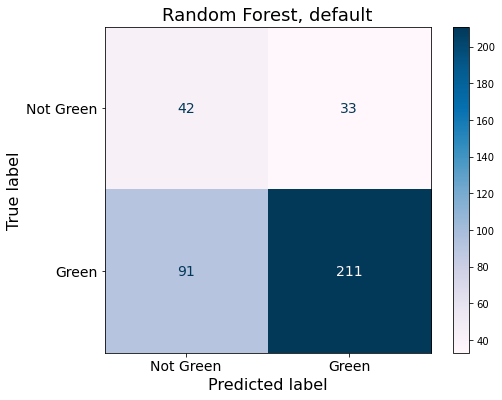

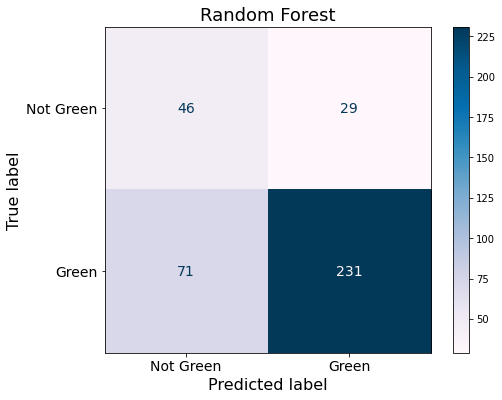

In [20]:
fig_con_de, ax_con_de = custom_confusin_matrix(y_tt_test, y_pred_default, "Random Forest, default")
fig_con_rfc, ax_con_rfc = custom_confusin_matrix(y_tt_test, y_pred_rfc, "Random Forest")


cm_figs = [fig_con_de, fig_con_rfc]
fig_file_names = ["CM Random Forest, default", "CM Random Forest"]

# save_figures
if save_figures:
    for each_f, each_n in zip(cm_figs, fig_file_names):
        fig_name = f"{figure_path}{each_n}"
        each_f.savefig(f"{fig_name}.pdf", 
                       dpi = 300, 
                       bbox_inches="tight")
        each_f.savefig(f"{fig_name}.png", 
                       dpi = 300, 
                       bbox_inches="tight")
        each_f.savefig(f"{fig_name}.svg", 
                       dpi = 300, 
                        bbox_inches="tight")